### 1. Packages 

First, let's run the cell below to import all the packages that you will need.
- [numpy](https://numpy.org/) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a popular library to plot graphs in Python.
- [tensorflow](https://www.tensorflow.org/) a popular platform for machine learning.

In [9]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import parameter

### 2. Dataset

In [10]:
import tensorflow_datasets as tfds

(ds_train, ds_validation), ds_info = tfds.load(
    'imagenette',
    split=['train', 'validation'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)


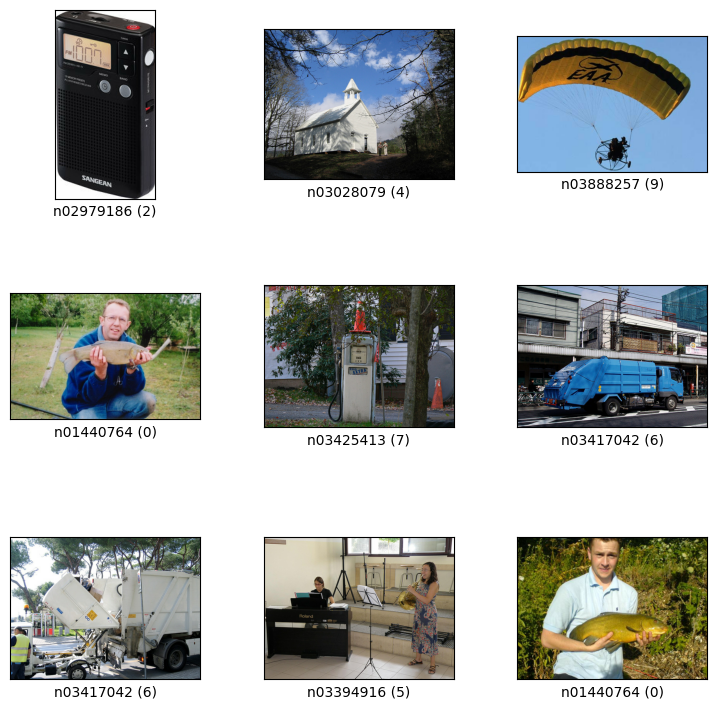

In [11]:
fig = tfds.show_examples(ds_train, ds_info)

In [ ]:
def normalize_img(image, label):
    image = tf.image.resize(image, (parameter.IMAGE_SIZE, parameter.IMAGE_SIZE))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

ds_train = ds_train.map(normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(parameter.BATCH_SIZE)
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)

ds_validation = ds_validation.map(normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_validation = ds_validation.batch(parameter.BATCH_SIZE)
ds_validation = ds_validation.prefetch(tf.data.experimental.AUTOTUNE)



### 3. Training

How to run:
- Change parameter

In [ ]:
# Dataset
parameter.DATASET = 'imagenette' #'imagenet_resized/64x64'
parameter.numclasses = 10 #1000

# Model
parameter.CONV_DO_RATE = 0.1 #[0, 0.05, 0.1, 0.3, 0.5] #Không cần thiết với PT
parameter.LINEAR_DO_RATE = 0.3 #[0, 0.05, 0.1, 0.3, 0.5]
parameter.LEARNING_RATE = 3e-4 #[6e-5, 3e-4, 1e-3]

In [ ]:
import tensorflow_datasets as tfds

import Models.InceptionV3_PT #Tất cả trừ resnet
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

model = Models.InceptionV3_PT.Model(parameter.numclasses)


In [ ]:
history = model.fit(
    ds_train,
    validation_data=ds_validation,
    epochs=1,
    verbose=2,
)

### 4. Test

In [ ]:
plt.plot(history.history['accuracy'], label="train accuracy")
plt.plot(history.history['val_accuracy'], label="validation accuracy")
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0,1)
plt.legend()
plt.savefig(fname=f'{model.model.name}_batch_size_{parameter.BATCH_SIZE}-{parameter.CONV_DO_RATE}-{parameter.LINEAR_DO_RATE}.png')
plt.show()
